In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
def fetch_historical_data(ticker):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365*2)
    stock = yf.Ticker(ticker)
    hist = stock.history(start=start_date, end=end_date)
    return hist

In [3]:
df = fetch_historical_data('TSLA')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-05-18 00:00:00-04:00,248.173340,253.500000,233.603333,236.603333,87811800,0.0,0.0
2022-05-19 00:00:00-04:00,235.666672,244.666672,231.369995,236.473328,90296700,0.0,0.0
2022-05-20 00:00:00-04:00,237.996674,240.526672,211.000000,221.300003,144973200,0.0,0.0
2022-05-23 00:00:00-04:00,218.339996,226.653336,212.686661,224.966660,88903500,0.0,0.0
2022-05-24 00:00:00-04:00,217.843338,217.973328,206.856674,209.386673,89092500,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-10 00:00:00-04:00,173.050003,173.059998,167.750000,168.470001,72627200,0.0,0.0
2024-05-13 00:00:00-04:00,170.000000,175.399994,169.000000,171.889999,67018900,0.0,0.0
2024-05-14 00:00:00-04:00,174.500000,179.490005,174.070007,177.550003,86407400,0.0,0.0


In [4]:
df2 = df.reset_index()['Close']
df2.shape

(502,)

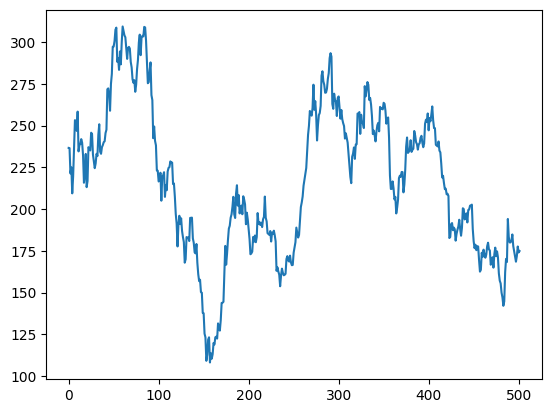

In [5]:
import matplotlib.pyplot as plt

plt.plot(df2)

In [6]:
def calculate_investment_value(hist, initial_amount):
    initial_price = hist['Close'][0]
    shares = initial_amount / initial_price
    hist['Investment Value'] = hist['Close'] * shares
    return hist

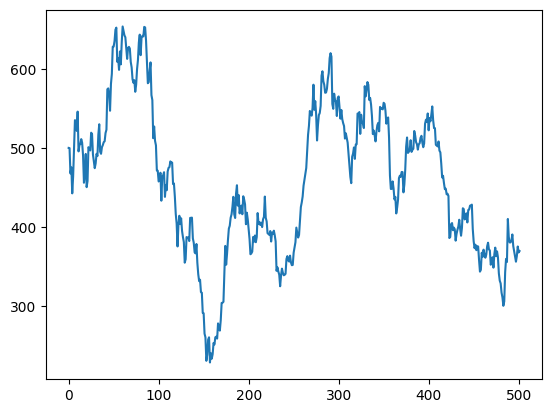

In [7]:
df3 = calculate_investment_value(df, 500)
df3 = df.reset_index()['Investment Value']
plt.plot(df3)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
df4 = scaler.fit_transform(np.array(df3).reshape(-1,1))
df4

array([[0.63862105],
       [0.63797497],
       [0.56256833],
       [0.58079046],
       [0.50336284],
       [0.55411988],
       [0.63517543],
       [0.72115099],
       [0.71888143],
       [0.68924555],
       [0.74661236],
       [0.62825096],
       [0.64695356],
       [0.64996854],
       [0.66477817],
       [0.65404364],
       [0.61688695],
       [0.53492029],
       [0.56053074],
       [0.62071363],
       [0.52181693],
       [0.54000592],
       [0.64077459],
       [0.6360534 ],
       [0.63100091],
       [0.68386175],
       [0.67995226],
       [0.61904048],
       [0.59830038],
       [0.57833875],
       [0.59220422],
       [0.62104493],
       [0.61441871],
       [0.67808036],
       [0.70899181],
       [0.62738959],
       [0.62106154],
       [0.64079112],
       [0.64711925],
       [0.65583273],
       [0.65821815],
       [0.68298377],
       [0.69277406],
       [0.81307355],
       [0.81574069],
       [0.79680605],
       [0.7492296 ],
       [0.828

In [9]:
train_size = int(len(df4) * 0.7)
test_size = len(df4) - train_size
train_data, test_data = df4[0:train_size,:], df4[train_size:len(df4),:1]

In [10]:
train_size, test_size

(351, 151)

In [11]:
def create_dataset(dataset, time_step=1):
    dX, dY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dX.append(a)
        dY.append(dataset[i + time_step, 0])
    return np.array(dX), np.array(dY)

In [12]:
time_step = 70
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)
X_train

array([[0.63862105, 0.63797497, 0.56256833, ..., 0.93925392, 0.93415168,
        0.89449354],
       [0.63797497, 0.56256833, 0.58079046, ..., 0.93415168, 0.89449354,
        0.87824272],
       [0.56256833, 0.58079046, 0.50336284, ..., 0.89449354, 0.87824272,
        0.84285859],
       ...,
       [0.70624193, 0.73620905, 0.7424709 , ..., 0.71314979, 0.68795346,
        0.76065997],
       [0.73620905, 0.7424709 , 0.7636914 , ..., 0.68795346, 0.76065997,
        0.75514354],
       [0.7424709 , 0.7636914 , 0.8533943 , ..., 0.76065997, 0.75514354,
        0.75752904]])

In [13]:
X_train.shape

(280, 70)

In [14]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape

(280, 70, 1)

In [15]:
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [16]:
model = build_model((X_train.shape[1], X_train.shape[2]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 70, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 70, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.fit(
    X_train, 
    Y_train, 
    validation_data=(X_test,Y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
9/9 [==============================] - 3s 95ms/step - loss: 0.1082 - val_loss: 0.0611
Epoch 2/100
9/9 [==============================] - 0s 33ms/step - loss: 0.0320 - val_loss: 0.0034
Epoch 3/100
9/9 [==============================] - 0s 34ms/step - loss: 0.0230 - val_loss: 0.0279
Epoch 4/100
9/9 [==============================] - 0s 37ms/step - loss: 0.0194 - val_loss: 0.0052
Epoch 5/100
9/9 [==============================] - 0s 33ms/step - loss: 0.0165 - val_loss: 0.0124
Epoch 6/100
9/9 [==============================] - 0s 35ms/step - loss: 0.0146 - val_loss: 0.0061
Epoch 7/100
9/9 [==============================] - 0s 32ms/step - loss: 0.0130 - val_loss: 0.0068
Epoch 8/100
9/9 [==============================] - 0s 35ms/step - loss: 0.0119 - val_loss: 0.0060
Epoch 9/100
9/9 [==============================] - 0s 35ms/step - loss: 0.0105 - val_loss: 0.0042
Epoch 10/100
9/9 [==============================] - 0s 34ms/step - loss: 0.0102 - val_loss: 0.0053
Epoch 11/100
9/9 [=

In [18]:
model.save('tesla_prediction.keras')

In [19]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 [==============================] - 0s 9ms/step


In [20]:
train_predict2 = scaler.inverse_transform(train_predict)
test_predict2 = scaler.inverse_transform(test_predict)

In [21]:
look_back = 70

trainPredictPlot = np.empty_like(df4)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict2)+look_back,:] = train_predict2

testPredictPlot = np.empty_like(df4)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1,:] = test_predict2

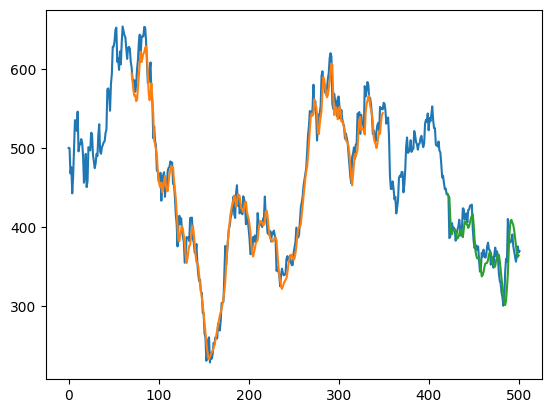

In [22]:
plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [23]:
len(test_data)

151

In [24]:
x_input=test_data[len(test_data)-look_back:].reshape(1,-1)
x_input.shape

(1, 70)

In [25]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
len(temp_input)

70

In [26]:
from keras.models import load_model

lst_output = []
n_steps = 70
i = 0

while(i < 30):
    if(len(temp_input) > 70):
        x_input = np.array(temp_input[1:])
        print(f"{i} day input {x_input}")
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        y_pred = model.predict(x_input, verbose=0)
        print(f"{i} day input {y_pred}")
        temp_input.extend(y_pred[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(y_pred.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        y_pred = model.predict(x_input, verbose=0)
        print(y_pred[0])
        temp_input.extend(y_pred[0].tolist())
        print(len(temp_input))
        lst_output.extend(y_pred.tolist())
        i += 1

lst_output

[0.32717943]
71
1 day input [0.40483051 0.424759   0.3977239  0.37729849 0.40060632 0.45895037
 0.45646553 0.42570317 0.4307226  0.44384257 0.41680747 0.45373219
 0.4553722  0.46685216 0.46605706 0.469834   0.39777357 0.36099793
 0.3401252  0.35061123 0.33416159 0.34623796 0.34509488 0.30503923
 0.27035086 0.27566845 0.32650831 0.31418351 0.33575192 0.32163804
 0.31174834 0.32069379 0.34574096 0.3564755  0.33639793 0.33356525
 0.29087568 0.29957263 0.31313984 0.28227807 0.32243313 0.34181495
 0.31637011 0.33048407 0.31284167 0.26528176 0.24356426 0.23531456
 0.20788188 0.19356924 0.16872082 0.18179104 0.2685121  0.308518
 0.2991253  0.42714442 0.3736209  0.35727067 0.35737001 0.36323427
 0.38097601 0.34643672 0.33108041 0.31741378 0.30001988 0.31701619
 0.34514463 0.32745256 0.33167675 0.32717943]
1 day input [[0.32829797]]
2 day input [0.424759   0.3977239  0.37729849 0.40060632 0.45895037 0.45646553
 0.42570317 0.4307226  0.44384257 0.41680747 0.45373219 0.4553722
 0.46685216 0.46605

[[0.3271794319152832],
 [0.3282979726791382],
 [0.32839640974998474],
 [0.3283897340297699],
 [0.32860273122787476],
 [0.3291386067867279],
 [0.3300361633300781],
 [0.3313156068325043],
 [0.3329857289791107],
 [0.33504799008369446],
 [0.33749714493751526],
 [0.3403205871582031],
 [0.3434979021549225],
 [0.34700584411621094],
 [0.3508131504058838],
 [0.354885458946228],
 [0.3591836988925934],
 [0.36366507411003113],
 [0.36828234791755676],
 [0.37298810482025146],
 [0.37773263454437256],
 [0.38246628642082214],
 [0.3871375322341919],
 [0.3916977345943451],
 [0.3960985243320465],
 [0.40029415488243103],
 [0.4042435884475708],
 [0.40791070461273193],
 [0.4112645387649536],
 [0.4142773747444153]]

In [27]:
day_new = np.arange(1,71)
day_pred = np.arange(71,101)
len(df4)

502

In [28]:
df5 = df4.tolist()
df5.extend(lst_output)

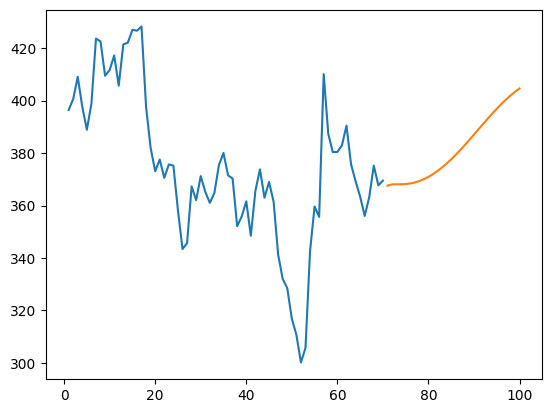

In [29]:
plt.plot(day_new, scaler.inverse_transform(df4[432:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

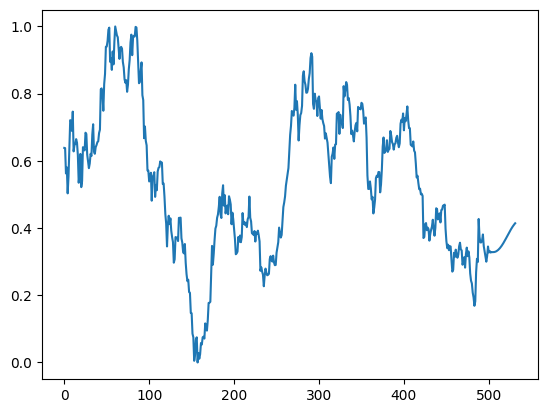

In [30]:
plt.plot(df5)

In [ ]:
plt.plot(scaler.inverse_transform(df5))